In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

sns.set("notebook", font_scale=1.05, rc={"figure.figsize": (10, 5)})
sns.set_style("ticks", rc={"figure.facecolor": "none", "axes.facecolor": "none"})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.set_loglevel("WARNING")
mpl.rcParams["lines.markersize"] = 8

now = datetime.datetime.now()
now_str = now.strftime("%m_%d_%H_%M")

## Helper functions

In [2]:
def make_barplot(data, df, df_random_baseline=None, save_path=None):
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 3))
    fig.suptitle(f'Policy performance on the {data} set', y=1.05)

    # Goal achieved
    sns.barplot(data=df[df['dataset'] == data], errorbar="sd", x='train_dataset_size', y='goal_achieved', ax=axs[0])
    axs[0].set_ylim(0, 1)
    axs[0].grid(True, alpha=0.3)

    # Collided
    sns.barplot(data=df[df['dataset'] == data], errorbar="sd", x='train_dataset_size', y='collided', ax=axs[1])
    axs[1].grid(True, alpha=0.3)

    # Off road
    sns.barplot(data=df[df['dataset'] == data], errorbar="sd", x='train_dataset_size', y='off_road', ax=axs[2])
    axs[2].grid(True, alpha=0.3)
        
    # Random policy performance
    if df_random_baseline is not None:
        rand_pi_mean_gr = df_random_baseline[df_random_baseline['dataset'] == data]['goal_achieved'].mean()
        rand_pi_mean_col = df_random_baseline[df_random_baseline['dataset'] == data]['collided'].mean()
        rand_pi_mean_off = df_random_baseline[df_random_baseline['dataset'] == data]['off_road'].mean()
        
        axs[0].axhline(rand_pi_mean_gr, color='r', linestyle='--', linewidth=2)
        axs[1].axhline(rand_pi_mean_col, color='r', linestyle='--', linewidth=2)
        axs[2].axhline(rand_pi_mean_off, color='r', linestyle='--', linewidth=2, label='Random policy')
        
        axs[1].set_ylim(0, rand_pi_mean_col + 0.05)
        axs[2].set_ylim(0, rand_pi_mean_off + 0.05)
        
    fig.legend()
    plt.tight_layout()

    sns.despine()
    if save_path:
        plt.savefig(save_path)
        
        
def make_histplot(data, df, bins=None, save_path=None):
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 3))
    fig.suptitle(f'Policy performance on the {data} set', y=1.05)

    # Goal achieved
    sns.histplot(data=df[df['dataset'] == data], x='goal_achieved', bins=bins, ax=axs[0])
    axs[0].grid(True, alpha=0.3)

    # Collided
    sns.histplot(data=df[df['dataset'] == data], x='collided', bins=bins, ax=axs[1])
    axs[1].grid(True, alpha=0.3)

    # Off road
    sns.histplot(data=df[df['dataset'] == data], x='off_road', bins=bins, ax=axs[2])
    axs[2].grid(True, alpha=0.3)
        
    fig.legend()
    plt.tight_layout()

    sns.despine()
    if save_path:
        plt.savefig(save_path)

## Configs

In [3]:
BASE_DIR = "..."
FIGURE_DIR = "..."

# Constants
GRID_ALPHA = 0.4
ERRORBAR = 'ci'
DATA = 'test'

colors = sns.color_palette("tab10").as_hex()
blue = colors[0]
orange = colors[1]
green = colors[2]
red = colors[3]
purple = colors[4]

SCENE_BASED_METRICS = ['goal_achieved_frac', 'collided_frac', 'off_road_frac', 'other_frac']
AGENT_BASED_METRICS = ['goal_achieved_count', 'collided_count', 'off_road_count', 'other_count']

In [4]:
sns.color_palette("tab10").as_hex()

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

### Load the results

In [ ]:
# Scaling laws dataframes
df_100 = pd.read_csv(BASE_DIR + 'model_PPO__R_100__02_23_21_28_06_645_006500.csv')
df_1000 = pd.read_csv(BASE_DIR + 'model_PPO__R_1000__02_23_22_34_47_084_007500.csv')
df_10_000 = pd.read_csv(BASE_DIR + 'model_PPO____R_10000__02_26_11_02_54_752_002800.csv')

#df_rand_baseline = pd.read_csv(BASE_DIR + "random_baseline.csv")

# Best model
df_10_000 = pd.read_csv(BASE_DIR + "model_PPO__C__R_10000__01_28_20_57_35_873_011426.csv")

### Aggregate performance

In [6]:
# tab_rand_baseline = df_rand_baseline.groupby('dataset')[['goal_achieved', 'collided', 'off_road']].agg(['mean', 'std'])
# tab_rand_baseline = tab_rand_baseline * 100  
# tab_rand_baseline = tab_rand_baseline.round(2)  

# tab_rand_baseline

In [7]:
df_10_000 = df_10_000[df_10_000['controlled_agents_in_scene'] != 0]

tab_10_000 = df_10_000.groupby('dataset')[SCENE_BASED_METRICS].agg(['mean', 'std'])
tab_10_000 = tab_10_000 * 100  
tab_10_000 = tab_10_000.round(2)  

tab_10_000

goal_achieved_frac       collided_frac       off_road_frac        \
                      mean   std          mean   std          mean   std   
dataset                                                                    
test                 99.81  1.53          0.44  3.17          0.31  2.59   

        other_frac       
              mean  std  
dataset                  
test          0.14  1.1

In [8]:
# Compute the sum of controlled agents
df = df_10_000[df_10_000['dataset'] == 'test']

total_controlled_agents = df['controlled_agents_in_scene'].sum()

# Group by 'dataset' and compute normalized values
tab_agent_based_10_000 = (df.groupby('dataset')[AGENT_BASED_METRICS].sum() / total_controlled_agents)*100

tab_agent_based_10_000.round(2)  

,goal_achieved_count,collided_count,off_road_count,other_count
dataset,,,,
test,99.81,0.32,0.18,0.17


### Error distribution

In [9]:
df_error = df_10_000[df_10_000['dataset'] == 'test']

df_error = df_10_000[
    (df_10_000['collided_frac'] > 0) |
    (df_10_000['off_road_frac'] > 0) |
    (df_10_000['other_frac'] > 0)
    
]

(df_error.shape[0] / df_10_000.shape[0]) * 100

8.959999999999999

In [10]:
df_error.head()

,scene,goal_achieved_count,goal_achieved_frac,collided_count,collided_frac,off_road_count,off_road_frac,other_count,other_frac,controlled_agents_in_scene,episode_lengths,dataset,model_name,train_dataset_size
4,tfrecord-00048-of-00150_243.json,3.0,1.000000,0.0,0.000000,1.0,0.333333,0.0,0.000000,3.0,44.0,test,model_PPO__C__R_10000__01_28_20_57_35_873_011426,10000
8,tfrecord-00029-of-00150_80.json,44.0,1.000000,1.0,0.022727,0.0,0.000000,0.0,0.000000,44.0,27.0,test,model_PPO__C__R_10000__01_28_20_57_35_873_011426,10000
15,tfrecord-00096-of-00150_283.json,36.0,0.972973,0.0,0.000000,0.0,0.000000,1.0,0.027027,37.0,90.0,test,model_PPO__C__R_10000__01_28_20_57_35_873_011426,10000
16,tfrecord-00061-of-00150_178.json,5.0,0.833333,0.0,0.000000,0.0,0.000000,1.0,0.166667,6.0,90.0,test,model_PPO__C__R_10000__01_28_20_57_35_873_011426,10000
24,tfrecord-00115-of-00150_93.json,16.0,0.941176,0.0,0.000000,1.0,0.058824,0.0,0.000000,17.0,90.0,test,model_PPO__C__R_10000__01_28_20_57_35_873_011426,10000


In [11]:
df_error.shape

(896, 14)

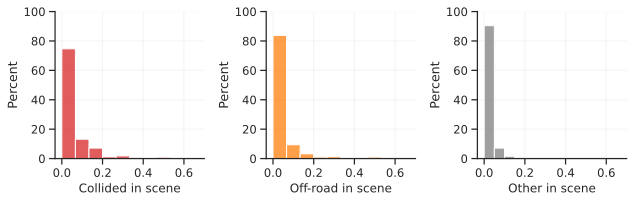

<Figure size 1000x500 with 0 Axes>

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True)
metrics = ['collided_frac', 'off_road_frac', 'other_frac']
titles = ['Collided in scene', 'Off-road in scene', 'Other in scene']
colors = [red, orange, 'grey']

for ax, metric, title, color in zip(axes, metrics, titles, colors):
    sns.histplot(df_error, stat='percent', color=color, x=metric, kde=False, bins=10, ax=ax)
    #ax.set_title(title, fontsize=14)
    ax.set_xlabel('')
    ax.grid(True, alpha=0.2)
    ax.set_ylim(0, 100)
    ax.set_xlabel(title, fontsize=12)
    sns.despine()

# Improve layout
#plt.xlabel("Scene-based metric (%)")
plt.tight_layout()
plt.show()
sns.despine()
fig.savefig(f'{FIGURE_DIR}eror_distribution_{now_str}.pdf', bbox_inches='tight', format='pdf');

In [ ]:
from scipy.stats import pearsonr

# Compute correlation and p-value
corr, p_value = pearsonr(df_error['collided_frac'], df_error['off_road_frac'])

print(f'Correlation: {corr:.4f}')
print(f'P-value: {p_value:.4f}')

alpha = 0.05  # Typical significance level


In [55]:
# THE_TABLE = tab_train_10_000_cont

# # Combine mean and std into "mean ± std"
# def format_mean_std(row):
#     formatted = {}
#     for col in row.index.get_level_values(0).unique():  # Iterate over the metric names
#         mean = row[(col, 'mean')]
#         std = row[(col, 'std')]
#         formatted[col] = f"{mean:.2f} ± {std:.2f}"
#     return formatted

# # Apply formatting to all rows
# tab_formatted = THE_TABLE.apply(format_mean_std, axis=1)

# # Flatten the result
# tab_formatted = pd.DataFrame(tab_formatted.tolist(), index=tab_formatted.index)

# # Generate LaTeX table
# latex_table = tab_formatted.to_latex(
#     index=True,
#     caption="Aggregate performance on WOMD (mean ± std)",
#     label="tab:aggregate_performance",
# )

# # Generate LaTeX table code with \resizebox to fit within a single column
# latex_code = """
# \\begin{table}[htbp]
# \\centering
# \\resizebox{\\columnwidth}{!}{
# \\begin{tabular}{@{}lcccc@{}} 
# \\toprule
# \\textbf{Dataset} & \\textbf{Goal achieved} & \\textbf{Collided} & \\textbf{Off-road} & \\textbf{Other} \\\\
# \\midrule
# """

# # Add rows to the table
# for idx, row in tab_formatted.iterrows():
#     latex_code += f"\\textbf{{{idx}}} & "  # dataset name in bold
#     latex_code += " & ".join([f"{value}" for value in row])  # values for each metric
#     latex_code += " \\\\ \n"

# # Closing part of the LaTeX table
# latex_code += """
# \\bottomrule
# \\end{tabular}
# }
# \\caption{Aggregate performance on train and 10,000 test traffic scenarios from the Waymo Open Motion Dataset (mean $\\pm$ std)}
# \\label{tab:aggregate_perf_best_policy}
# \\end{table}
# """
# print(latex_code)

## 2. Scaling laws


In [16]:
df = pd.concat([df_100, df_1000, df_10_000]).reset_index(drop=True)
categories = ['goal_achieved_frac','collided_frac', 'off_road_frac']
df[categories] = df[categories] * 100
df['train_dataset_size'] = df['train_dataset_size'].apply(lambda x: f"{int(x):,}")

In [ ]:
ERRORBAR = 'se'
MARKERSIZE = 6
MARKER = 's'

fig, axs = plt.subplots(1, 3, figsize=(9.3, 3))

# Goal achieved
sns.pointplot(
    data=df[df['dataset'] == DATA], 
    errorbar=ERRORBAR, 
    x='train_dataset_size', 
    y='goal_achieved_frac', 
    marker='o',
    markersize=MARKERSIZE,
    color=blue, 
    ax=axs[0]
)
axs[0].set_ylim(70, 105)
axs[0].grid(axis='y', linestyle='-', color='lightgrey', alpha=0.3)
axs[0].set_xlabel("Training dataset size", labelpad=10)
# Add horizontal line at 100%
axs[0].axhline(100, color='#aac0ea', linestyle='--', linewidth=2, zorder=0)
axs[0].set_ylabel("Goal achieved [%]")

# Collided
sns.pointplot(
    data=df[df['dataset'] == DATA], 
    errorbar=ERRORBAR, 
    x='train_dataset_size', 
    y='collided_frac', 
    marker='s',
    markersize=MARKERSIZE,
    color=red, 
    ax=axs[1]
)

axs[1].set_ylim(-2, 15)
axs[1].grid(axis='y', linestyle='-', color='lightgrey', alpha=0.3)
axs[1].axhline(0, color='#ffc7c4', linestyle='--', linewidth=2, zorder=0)
axs[1].set_xlabel("Training dataset size", labelpad=10)
axs[1].set_ylabel("Collided [%]")

# Off road
sns.pointplot(
    data=df[df['dataset'] == DATA], 
    errorbar=ERRORBAR, 
    x='train_dataset_size', 
    y='off_road_frac', 
    marker="D",
    markersize=MARKERSIZE,
    color=orange, 
    ax=axs[2]
)

axs[2].set_ylim(-2, 15)
axs[2].grid(axis='y', linestyle='-', color='lightgrey', alpha=0.3)
axs[2].set_xlabel("Training dataset size", labelpad=10)
axs[2].axhline(0, color="#ffb995", linestyle='--', linewidth=2, zorder=0)
axs[2].set_ylabel("Off-road [%]")

plt.tight_layout()
sns.despine()
plt.savefig(f'{FIGURE_DIR}scaling_laws_point_{now_str}_simple.pdf', bbox_inches='tight', format='pdf')